#### Deep Learning : AI2100

#### HW1

#### Tanmay Goyal- AI20BTECH11021

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

##### Important pieces of code from the last assignment

##### Entropy

In [4]:
# writing a function to calculate the entropy of a pmf
def entropy(pmf):
    
    if np.sum(pmf)!= 1.0:
        print("Invalid PMF") # checking for validity of pmf
        return 0
    
    else:
        entropy = 0

        for p in pmf:
            if(p < 0):
                print("Invalid PMF") # checking for validity of pmf
                return 0
            
            elif p==0:
                continue

            else:
                entropy += p * np.log2(p)

        return -entropy


##### Bernoulli PMF

In [5]:
# defining a function to obtain Bernoulli PMF 
def bern(p):

    return np.array([p , 1.0 - p])

##### Normalised Histogram of an Image

In [6]:
def normalised_hist(img_name):
    
    img = plt.imread(img_name)
    hist = np.zeros((256,) , dtype = int) # since pixel intensity can take values between 0 and 255

    # if datattype of array is float 32, we would want it to be uint8 to get exact pixel intensity 
    # and not relative intensity. So, we scale by multiplying by 255 and convert the datatype.
    if img.dtype == np.float32:
        img = img * 255
        img = img.astype(np.uint8)

    # taking count of rows and columns
    (row,column) = img.shape

    # counting pixels of a particular intensity
    for i in range(row):
        for j in range(column):
            hist[img[i][j]] += 1

    # normalising the histogram
    hist = hist/(row*column)

    # plt.stem(np.arange(0,256,1), hist , linefmt = 'r-', markerfmt = 'r')
    # plt.xlabel("Pixel Intensity")
    # plt.ylabel("Normalised Count")
    # plt.title("Normalised histogram of {}".format(img_name))
    # plt.grid(True)
    # plt.show()
    
    return hist

##### KL Divergence of two PMFs

In [7]:
def kl_div(p , q):
    
    div = 0

    # the length of p and q is the same, as they take values for the same random variable
    for i in range(len(p)):
        
        if p[i] < 0 or q[i] < 0:
            print("Invalid PMFs")   # checking for validity
            return 0
        
        elif p[i] == 0 or q[i]==0:
            continue

        else:
            div += p[i] * np.log2(p[i]/q[i])

    return div


##### Histograms of left.png and right.png

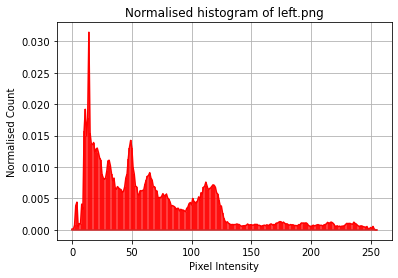

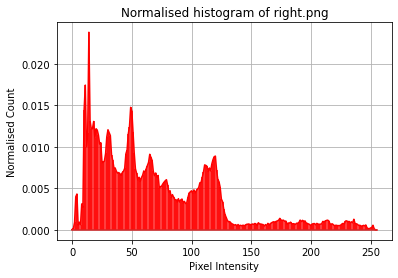

In [8]:
hist_left = normalised_hist("left.png")

plt.stem(np.arange(0,256,1), hist_left , linefmt = 'r-', markerfmt = 'r')
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalised Count")
plt.title("Normalised histogram of left.png")
plt.grid(True)
plt.show()


hist_right = normalised_hist("right.png")

plt.stem(np.arange(0,256,1), hist_right , linefmt = 'r-', markerfmt = 'r')
plt.xlabel("Pixel Intensity")
plt.ylabel("Normalised Count")
plt.title("Normalised histogram of right.png")
plt.grid(True)
plt.show()

##### Question 1: Distance between PDFs

##### Use the normalised histogram of stereo image pair("left.png" , "right.png")

##### a) Cross Entropy

##### The cross entropy between two PDFs is given by $H(p,q) = H(p) + D(p||q)$ where $H(p)$ is the entropy of $p$ and $D(p||q)$ is the KL Divergence between $p$ and $q$. Write a function that accepts two PDFs and outputs the cross entropy between them.

In [9]:
def cross_entropy(p , q):
    return entropy(p) + kl_div(p,q)

##### (i) Verify the function using the stereo image normalised histogram pair.

In [10]:
print("The cross-entropy of 'left.png' and 'right.png' is {}".format(cross_entropy(hist_left , hist_right)))

The cross-entropy of 'left.png' and 'right.png' is 7.273398119987328


##### (ii) Choose a fixed PMF $p \sim Bern(r)$ and choose $q \sim Bern(q)$ where $q$ can be varied. Plot $H(p,q)$ as a function of $s$. Does minimising $H(p,q)$ give us matched PMFs?

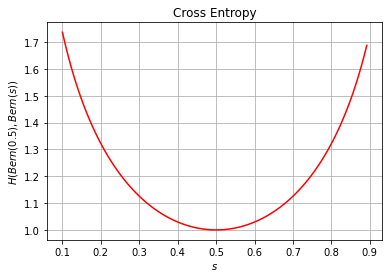



 When the cross entropy is minimum, the value of s is 0.5, which is equal to the value of r.

 Thus, we do get matching PMFs when minimising the cross entropy.


In [11]:
# fixing r = 0.5
r = 0.5

s_vals = np.linspace(0.1, 0.9 , 100 , endpoint = False) # avoiding issues with s = 0 and s = 1

cross_entropies = np.array([cross_entropy(bern(r) , bern(s)) for s in s_vals])

plt.plot(s_vals , cross_entropies , 'r-')
plt.grid(True)
plt.title("Cross Entropy")
plt.xlabel("$s$")
plt.ylabel("$H(Bern(0.5) , Bern(s))$")
plt.show()

# finding argmin of cross entropy
idx = np.where(cross_entropies == cross_entropies.min())
print("\n\n When the cross entropy is minimum, the value of s is {}, which is equal to the value of r.".format(s_vals[idx[0][0]]))
print("\n Thus, we do get matching PMFs when minimising the cross entropy.")

##### b) Jensen Shannon (JS) Divergence:

##### The JS divergence is given $J(p,q) = D(p||m) + D(q||m) $ where $m = \frac{p+q}{2}$ and $D(p||q)$ is the KL divergence between $p$ and $q$. Write a function that accepts two PDFs and outputs the JS divergence between them. Verify $JS(p,q)$ is symmetric indeed while $D(p||q)$ is not, using the normalised histograms of the stereo image pair.



In [12]:
def JS_div(p,q):
    m = (p+q)/2
    return kl_div(p,m) + kl_div(q,m)

In [13]:
print("The JS divergence of 'left.png' and 'right.png' is {}, while that of 'right.png' and 'left.png' is {}".\
    format(JS_div(hist_left , hist_right) , \
        JS_div(hist_right , hist_left)))

print("\nThe KL divergence of 'left.png' and 'right.png' is {}, while that of 'right.png' and 'left.png' is {}".\
    format(kl_div(hist_left , hist_right) , \
        kl_div(hist_right , hist_left)))

print("\nClearly we see that the JS divergence is symmetric while the KL divergence is not.")

The JS divergence of 'left.png' and 'right.png' is 0.0073460795386296514, while that of 'right.png' and 'left.png' is 0.0073460795386296514

The KL divergence of 'left.png' and 'right.png' is 0.015104015237387055, while that of 'right.png' and 'left.png' is 0.014409785833354494

Clearly we see that the JS divergence is symmetric while the KL divergence is not.


##### c) Wasserstein Distance

##### The Wasserstein-1 distance between two PDFs is given $W_1(r,s) = \underset{\pi \in \Pi(r,s)} {\inf} \mathbb{E}_{(x,y) \sim\pi} |x-y| $. The set $\Pi(r,s)$ is composed of all bivariate joint PDFs whose marginals are equal to $r$ and $s$. Given a tuple $(p_{(X,Y)}, r_X, s_Y)$ of a joint histogram $p_(X,Y)$, and marginals $r_X$ and $s_Y$, write a function that accepts this tuple and checks if $p_{X , Y} \in \Pi(r,s)$. Verify your function with a positive example and a negative example.

In [14]:
def check_marginal(J , r , s):
    # Let X represents the rows and Y represents the columns. This would typically be how the joint PMF would look
    # Y ->|   1   2   3   4
    # X |
    # 1 |
    # 2 |
    # 3 |
    # 4 |

    marginal_x = np.zeros(J.shape[0])
    marginal_y = np.zeros(J.shape[1])

    # checking for validity of input marginals
    if r.sum() != 1 or s.sum() != 1:
        print("Invalid PMFs given as input")
        return False

    # for the marginal of X, we would have to take sum over all possible ys, i.e all possible columns
    # for the marginal of Y, we would have to take sum over all possible xs, i.e all possible rows

    for row in range(marginal_x.shape[0]):
        marginal_x[row] = np.around(J[row , :].sum() , 2)

    for column in range(marginal_y.shape[0]):
        marginal_y[column] = np.around(J[: , column].sum() , 2)

    if (marginal_x == r).all() and (marginal_y == s).all():
        return True
    else:
        return False

    

In [15]:
# POSITIVE EXAMPLE

# defining Joint PMF
J = [
    [0.3 , 0.1 , 0],
    [0 , 0.1 , 0],
    [0 , 0.2 , 0.1],
    [0 , 0 , 0.2]
]

J = np.matrix(J)

# defining marginals
r = np.array([0.4 , 0.1 , 0.3 , 0.2])
s = np.array([0.3 , 0.4 , 0.3])

print(check_marginal(J,r,s))

True


In [16]:
# NEGATIVE EXAMPLE

# defining Joint PMF
J = [
    [0.3 , 0.1 , 0],
    [0 , 0.1 , 0],
    [0 , 0.2 , 0.1],
    [0 , 0 , 0.2]
]

J = np.matrix(J)

# defining marginals
r = np.array([0.2 , 0.4 , 0.1 , 0.3])
s = np.array([0.2 , 0.5 , 0.3])

print(check_marginal(J,r,s))

False


##### Question 2: Visualising data with t-SNE

##### a) Answer based on the t-SNE paper.

##### (i) What is the crowding problem?

##### Answer:

The crowding problem says that if we reduce the dimensionality of certain points to a two dimensional area for better visualisation, it may be the case that the distant points may not be accuractely represented with the same scale used for mapping nearer datapoints, i.e if the nearer data points are accurately mapped, the further datapoints would be too far away, not capturing the complete picture. An example would be having $n+1$ equidistant points in a $n$-dimensional space, but bringing them to 2D may not capture the equidistance property in the best possible manner. So to capture the nearby points correctly, the rest of the points would have to be placed far away.

##### (ii) How does the choice of t- Student distribution in the low dimensional embedding space help address the crowding problem?

##### Answer:

The t- Student distribution is used to compute the joint probabilities in the lower dimensional space as:

$q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum\limits_{k \neq l}(1 + ||y_k - y_l||^2)^{-1}}$

What this ensures is that if two points are further away, $||y_k - y_l||^2$ would increase very fast. However, taking the inverse of it makes sure that the joint probabilities do not majorly change due to these set of points. The t-Student Distribution has a heavier tilt than the Gaussian, which means we would require larger values in a t-Student distribution for the joint probability to approach zero, which means we can represent far away points better. This also means cluster of points far away can behave as indiviual points.

##### (iii) What other important changes have been made in t-SNE relative to SNE?

##### Answer:

Apart from introducing t- distributions with a heavy tail, t-SNEs try to work on the non-convex cost function, difficult to optimise, by making the probabilities in the higher dimensional space symmetrical, and has simpler gradients. This, along with the new t- distribution makes sure that the optimisation becomes simpler, and also helps to counter the crowding problem.

##### b) Implement algorithm 1.

In [109]:
    
def t_SNE(eta , alpha):
    # setting a seed for convinience
    np.random.seed(20)
    
    # number of points
    n = 20  

    # generating two clusters of points as specified
    mean1 = np.ones((10,))
    mean2 = 10 * np.ones((10,))
    cov = 0.01 * np.identity(10)

    cluster1 = np.random.multivariate_normal(mean1 , cov , n//2)
    cluster2 = np.random.multivariate_normal(mean2 , cov , n//2)

    # forming the set X
    X = np.vstack((cluster1 , cluster2))

    # computing pairwise affinities
    P_given = np.zeros((n,n))        # 20 datapoints
    for i in range(n):
        # since sigma is the variance of the gaussians 
        if (i < n//2):
            sigma = cov[i][i]
        else:
            sigma = cov[i-n//2][i-n//2]
        
        temp_calc = []      # will hold information about the squared norms/2 * sigma for a particular row
        
        # to take sigma^2 = 0.01, since formula requires sigma^2 in denominator, we simply put sigma
        for j in range(n):
            if(i==j):
                temp_calc.append(0) 
            else:
                temp_calc.append(-(np.linalg.norm(X[i] - X[j]) ** 2) / (2 * sigma))

        temp_calc = np.array(temp_calc)
        temp_calc = np.exp(temp_calc)

        for j in range(n):
                P_given[i][j] = temp_calc[j] / (temp_calc.sum()) 

    # defining P_symmetric matrix
    P = (P_given + P_given.T)/(2 * n)

    # setting initial solution 
    Y_0 = np.random.multivariate_normal([0,0] , 0.0001*np.identity(2) , n)
    Y_iter = Y_0.copy()
    Y_prev = [Y_0]      # keeping track of previous Ys
    Q = np.zeros((n,n))
    Q_final = np.zeros((n,n))
    Q_init = np.zeros((n,n))

    T = 50         # number of iterations

    for iter in range(T):
        
        # finding the qs
        for i in range(n):
            for j in range(n):
                if i == j:
                    Q[i][i] = 0
                else:
                    Q[i][j] = np.power((1 + np.linalg.norm(Y_iter[i] - Y_iter[j]) ** 2) , -1)
        
        Q /= Q.sum()

        # storing the very first and last Q for calculation of KL Divergence
        if iter == 0:
            Q_init = Q.copy()
        if iter == T-1:
            Q_final = Q.copy()
        
        # Computing gradient
        gradient = []
        
        for i in range(n):
            sum = 0
            for j in range(n):
                sum += 4 * (P[i][j] - Q[i][j]) * (Y_iter[i] - Y_iter[j]) * np.power((1 + np.linalg.norm(Y_iter[i] - Y_iter[j])**2) , -1)
            gradient.append(sum)
        
        gradient = np.array(gradient)

        # updating the Ys
        if(iter != 0):
            Y_iter += (eta * gradient) + alpha * (Y_prev[-1] - Y_prev[-2])
            Y_prev.append(Y_iter)
            del Y_prev[0]
            
        else:        
            Y_iter += (eta * gradient) + alpha * (Y_prev[-1])
            Y_prev.append(Y_iter)
           
    Y_final = Y_iter.copy()

    # plotting points at beginning of iteration
    plt.plot(Y_0[: , 0] , Y_0[: , 1] , 'ro')
    plt.grid(True)
    plt.title("At the beginning of the 0th iteration for learning rate = {} and momentum = {}".format(eta , alpha))
    plt.show()

    # plotting points at end of iterations
    plt.plot(Y_final[: , 0] , Y_final[: , 1] , 'ro')
    plt.grid(True)
    plt.xlim(-3,3)        
    plt.ylim(-3,3)
    plt.title("At the end of the 50th iteration for learning rate = {} and momentum = {}".format(eta , alpha))
    plt.show()

    kl_init = 0
    kl_final = 0
    
    # Normalising to make sure inputs to kl_div behave like pdfs
    for i in range(n):
            kl_init += kl_div(P[i] / P[i].sum() , Q_init[i] / Q_init.sum())
            kl_final += kl_div(P[i] / P[i].sum() , Q_final[i] / Q_final.sum())

    print("The KL Divergence between P and Q before 0th iteration for learning rate = {} and momentum = {} is {}".format(eta , alpha , kl_init))
    print("The KL Divergence between P and Q after 50th iteration for learning rate = {} and momentum = {} is {}".format(eta , alpha , kl_final))


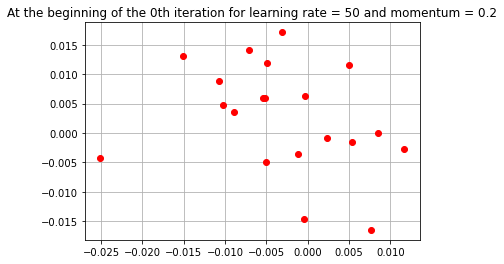

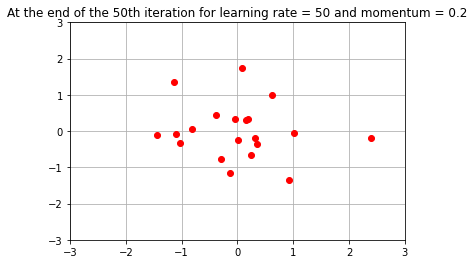

The KL Divergence between P and Q before 0th iteration for learning rate = 50 and momentum = 0.2 is 3.1979413279327487
The KL Divergence between P and Q after 50th iteration for learning rate = 50 and momentum = 0.2 is 2.7209834164663316


In [110]:
t_SNE(50 , 0.2)

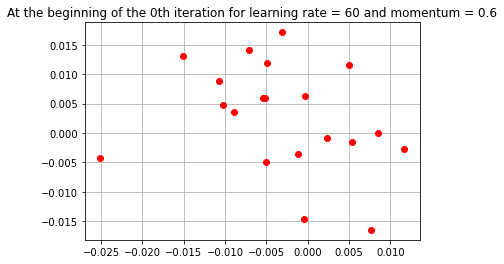

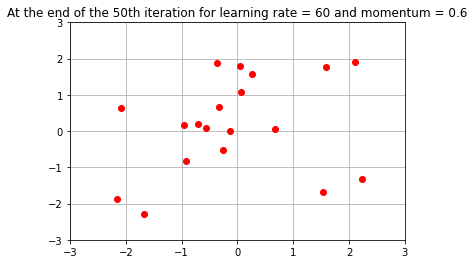

The KL Divergence between P and Q before 0th iteration for learning rate = 60 and momentum = 0.6 is 3.1979413279327487
The KL Divergence between P and Q after 50th iteration for learning rate = 60 and momentum = 0.6 is 2.5397356717946784


In [111]:
t_SNE(60 , 0.6)

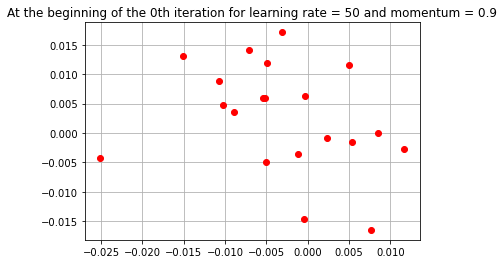

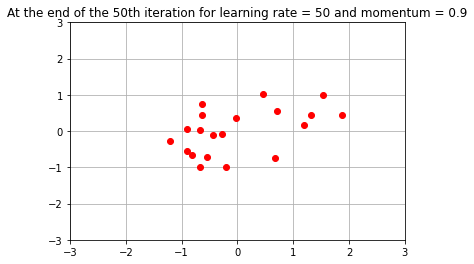

The KL Divergence between P and Q before 0th iteration for learning rate = 50 and momentum = 0.9 is 3.1979413279327487
The KL Divergence between P and Q after 50th iteration for learning rate = 50 and momentum = 0.9 is 2.2317728614378116


In [112]:
t_SNE(50 , 0.9)

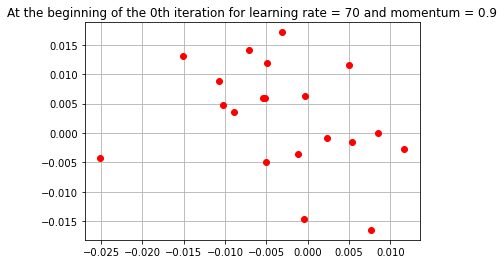

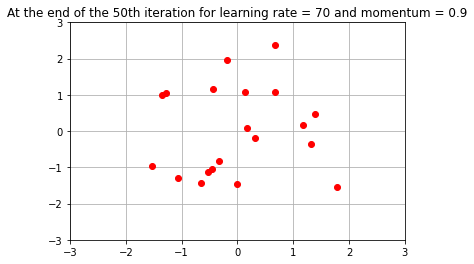

The KL Divergence between P and Q before 0th iteration for learning rate = 70 and momentum = 0.9 is 3.1979413279327487
The KL Divergence between P and Q after 50th iteration for learning rate = 70 and momentum = 0.9 is 3.2031149466893383


In [113]:
t_SNE(70 , 0.9)

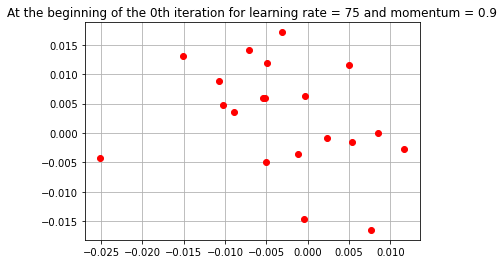

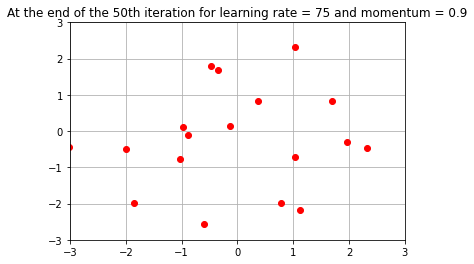

The KL Divergence between P and Q before 0th iteration for learning rate = 75 and momentum = 0.9 is 3.1979413279327487
The KL Divergence between P and Q after 50th iteration for learning rate = 75 and momentum = 0.9 is 3.5276285036848005


In [114]:
t_SNE(75 , 0.9)

In [115]:
print("OBSERVATIONS \n\n")

print("Y- initially the points are randomly selected, but as we go through the iterations," 
"they tend to mimic the structure of points in the higher dimensions, as pointed out by the KL divergence \n")

print("KL-divergence: initially the KL divergence is high, but as we go through the iterations," 
"the gradient descent ensures the error reduces, and the KL Divergence tends to reduce, meaning we are " 
"coming closer and closer to mimicing the structure of points in the higher dimensions." 
"In some cases the KL divergence increases slightly, which can be reduced by increasing the number of iterations.")

OBSERVATIONS 


Y- initially the points are randomly selected, but as we go through the iterations,they tend to mimic the structure of points in the higher dimensions, as pointed out by the KL divergence 

KL-divergence: initially the KL divergence is high, but as we go through the iterations,the gradient descent ensures the error reduces, and the KL Divergence tends to reduce, meaning we are coming closer and closer to mimicing the structure of points in the higher dimensions.In some cases the KL divergence increases slightly, which can be reduced by increasing the number of iterations.


##### c) Experiment with the built in function t-SNE utility. Choose different perplexity values between 5 and 50. How does perplexity affect the plots? 

In [116]:
np.random.seed(20)
    
n = 20  # number of points

# generating two clusters of points as specified
mean1 = np.ones((10,))
mean2 = 10 * np.ones((10,))

cov = 0.01 * np.identity(10)

cluster1 = np.random.multivariate_normal(mean1 , cov , n//2)
cluster2 = np.random.multivariate_normal(mean2 , cov , n//2)

# forming the set X
X = np.vstack((cluster1 , cluster2))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


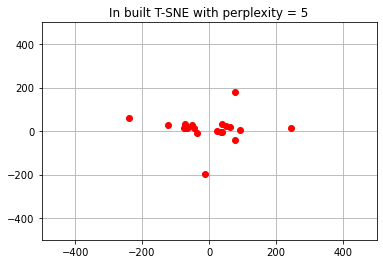

In [117]:
output = TSNE(n_components = 2 , perplexity = 5 ,n_iter = 250).fit_transform(X)

plt.plot(output[:,0] , output[:,1], 'ro')
plt.grid(True)
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("In built T-SNE with perplexity = 5")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


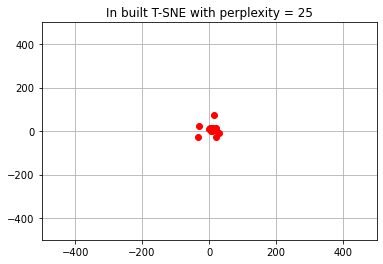

In [118]:
output = TSNE(n_components = 2 , perplexity = 25 ,n_iter = 250).fit_transform(X)

plt.plot(output[:,0] , output[:,1], 'ro')
plt.grid(True)
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("In built T-SNE with perplexity = 25")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


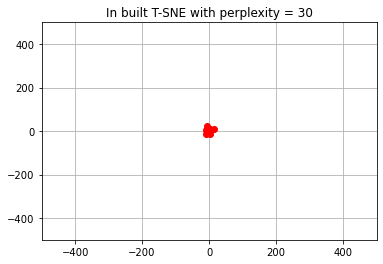

In [119]:
output = TSNE(n_components = 2 , perplexity = 30 ,n_iter = 250).fit_transform(X)

plt.plot(output[:,0] , output[:,1], 'ro')
plt.grid(True)
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("In built T-SNE with perplexity = 30")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


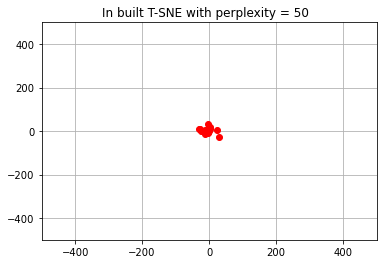

In [120]:
output = TSNE(n_components = 2 , perplexity = 50 ,n_iter = 250).fit_transform(X)

plt.plot(output[:,0] , output[:,1], 'ro')
plt.grid(True)
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("In built T-SNE with perplexity = 50  ")
plt.show()

In [121]:
# OBSERVATIONS

print("We observe that as the perplexity increases the group size tends to decrease and there is more clarity" 
"in the structure of the groups. The extreme X and Y axis limits are to ensure we can unifromly check structures across all graphs.")

We observe that as the perplexity increases the group size tends to decrease and there is more clarityin the structure of the groups. The extreme X and Y axis limits are to ensure we can unifromly check structures across all graphs.


##### Question 3: Convolution and Correlation

##### a) Convolution 

##### Write a function that accepts an image $W \times H \times C$ and a convolution kernel $h$ of size $k \times k \times C$ as inputs, and generates the channel-wise convolved image $J = I * h$ as the output.

In [122]:
def conv(img ,  kernel):
    
    # checking for validity of image and kernel sizes
    (W,H,C) = img.shape
    if C != kernel.shape[2] or kernel.shape[0] != kernel.shape[1]:
        print("Invalid image or kernel size")
        return False
    
    k = kernel.shape[0]

    
    # we have been asked to use reflection padding
    # all the indices have been calculated with care
    padded = np.zeros((W + 2 * (k-1) , H + 2 * (k-1) , C))

    # copying the image to the center patch
    padded[k-1 : W + k-1 , k-1 : H + k-1] = img

    # doing reflection padding
    # top and bottom
    padded[:k-1 , :] = np.flip(padded[k : 2*k - 1, :] , axis = 0)       # taking reflection
    padded[W + k-1: , :] = padded[W : W + k - 1, :]
        
    # doing reflection padding
    # sides
    padded[: , :k-1] = np.flip(padded[: , k : 2*k - 1] , axis = 1)     # taking reflection
    padded[: ,H + k-1:] = padded[: , H : H + k-1]
    
    
    # flipping kernel
    kernel = kernel[::-1 , ::-1 , :]
   
    # doing the convolution
    output = np.zeros((W + k - 1 , H + k - 1))

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            sum = 0
            pad_patch = padded[i : i+k , j : j+k , :]
            output[i][j] = np.sum(np.multiply(pad_patch,kernel)) 

    # dividing output by sum of kernel
    if(kernel.sum() != 0):
        output = output // kernel.sum()

    return output[(k-1)//2 : (k-1)//2 + W , (k-1)//2 : (k-1)//2 + H]


##### b) Correlation

##### Write a function that accepts an image $W \times H \times C$ and a correlation template $h$ of size $k \times k \times C$ as inputs, and generates the channel-wise correlation image $J = corr(I,h)$ as the output.

In [123]:
def corr(img ,  kernel):
    
    # checking for validity of image and kernel sizes
    (W,H,C) = img.shape
    if C != kernel.shape[2] or kernel.shape[0] != kernel.shape[1]:
        print("Invalid image or kernel size")
        return False
    
    k = kernel.shape[0]

    # we have been asked to use reflection padding
    # all the indices have been calculated with care
    padded = np.zeros((W + 2 * (k-1) , H + 2 * (k-1) , C))

    # copying the image to the center patch
    padded[k-1 : W + k-1 , k-1 : H + k-1] = img

    # doing reflection padding
    # top and bottom
    padded[:k-1 , :] = np.flip(padded[k : 2*k - 1, :] , axis = 0)       # taking reflection
    padded[W + k-1: , :] = padded[W : W + k - 1, :]
        
    # doing reflection padding
    # sides
    padded[: , :k-1] = np.flip(padded[: , k : 2*k - 1] , axis = 1)     # taking reflection
    padded[: ,H + k-1:] = padded[: , H : H + k-1]
    
    # we donot flip the kernel
   
    # doing the correlation
    output = np.zeros((W + k - 1 , H + k - 1))

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            sum = 0
            pad_patch = padded[i : i+k , j : j+k , :]
            output[i][j] = np.sum(np.multiply(pad_patch,kernel)) 

    # dividing output by sum of kernel
    if(kernel.sum() != 0):
        output = output // kernel.sum()

    return output[(k-1)//2 : (k-1)//2 + W , (k-1)//2 : (k-1)//2 + H]


Visulaising the differences:

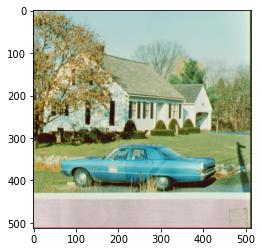

In [124]:
# reading image
img = plt.imread("house.tiff")
plt.imshow(img)

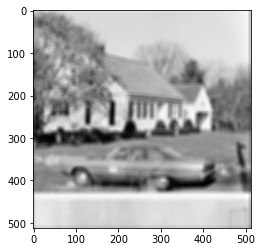

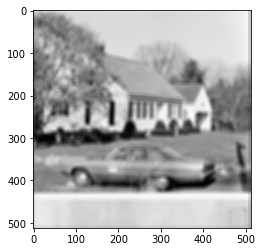

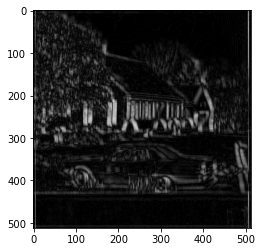

In [125]:
# extracting kernel
kernel = img[:11 , :11 , :]

conv_img = conv(img , kernel)
corr_img = corr(img , kernel)

plt.imshow(conv_img , cmap = 'gray')
plt.show()
plt.imshow(corr_img, cmap = 'gray')
plt.show()

# to notice the difference
plt.imshow(np.abs(conv_img - corr_img) , cmap = 'gray')
plt.show()

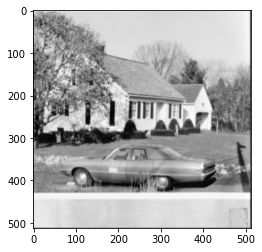

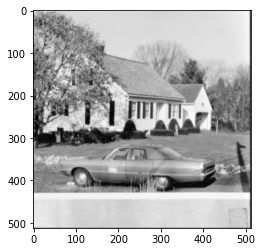

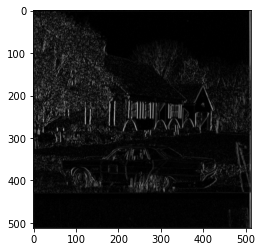

In [126]:
# extracting kernel
kernel = img[:3 , :3 , :]

conv_img = conv(img , kernel)
corr_img = corr(img , kernel)
plt.imshow(conv_img, cmap = 'gray')
plt.show()
plt.imshow(corr_img, cmap = 'gray')
plt.show()

# to notice the difference
plt.imshow(np.abs(conv_img - corr_img) , cmap = 'gray')
plt.show()

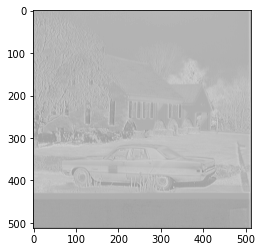

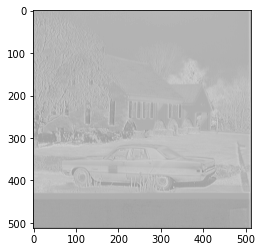

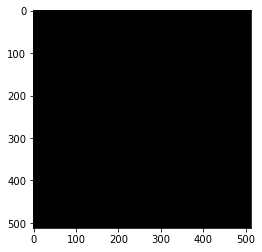

In [127]:
# EXAMPLE - RIDGE DETECTION - symmetric kernel

kernel = np.array([[[0,-1,0] , [-1,4,-1] , [0,-1,0]] for i in range(3)]).reshape((3,3,3))

conv_img = conv(img , kernel)
corr_img = corr(img , kernel)

plt.imshow(conv_img, cmap = 'gray')
plt.show()
plt.imshow(corr_img, cmap = 'gray')
plt.show()

# to notice the difference-  no difference when symmetric kernel is used
plt.imshow(np.abs(conv_img - corr_img) , cmap = 'gray')
plt.show()